<a href="https://colab.research.google.com/github/Vaishnavi-T-G/Sales_Data/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_column',None)

In [11]:
Store_data = pd.read_excel("/content/sample_data/Online-Store-Orders.xlsx")
Store = Store_data.copy()
Store.to_csv('Store.csv', index =False)

In [12]:
Store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          1200 non-null   object        
 1   Date             1200 non-null   datetime64[ns]
 2   CustomerID       1200 non-null   object        
 3   Product          1200 non-null   object        
 4   Quantity         1200 non-null   int64         
 5   UnitPrice        1200 non-null   float64       
 6   ShippingAddress  1200 non-null   object        
 7   PaymentMethod    1200 non-null   object        
 8   OrderStatus      1200 non-null   object        
 9   TrackingNumber   1200 non-null   object        
 10  ItemsInCart      1200 non-null   int64         
 11  CouponCode       891 non-null    object        
 12  ReferralSource   1200 non-null   object        
 13  TotalPrice       1200 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(

In [13]:
Store.describe()

,Date,Quantity,UnitPrice,ItemsInCart,TotalPrice
count,1200,1200.000000,1200.000000,1200.000000,1200.000000
mean,2024-03-22 16:58:48,2.945833,356.412750,5.485000,1053.968300
min,2023-01-01 00:00:00,1.000000,11.390000,1.000000,11.390000
25%,2023-08-03 18:00:00,2.000000,186.062500,4.000000,410.520000
50%,2024-03-23 00:00:00,3.000000,364.210000,5.000000,823.615000
75%,2024-11-08 12:00:00,4.000000,521.570000,7.000000,1578.475000
max,2025-06-30 00:00:00,5.000000,699.930000,10.000000,3456.400000
std,NaN,1.407557,197.177146,2.281983,819.856558


In [18]:
Store.head(5)

,OrderID,Date,CustomerID,Product,Quantity,UnitPrice,ShippingAddress,PaymentMethod,OrderStatus,TrackingNumber,ItemsInCart,CouponCode,ReferralSource,TotalPrice
0,ORD200000,2023-01-04,C72649,Monitor,5,570.62,928 Main St,Debit Card,Shipped,TRK37947903,7,SAVE10,Instagram,2853.10
1,ORD200001,2024-08-23,C75739,Phone,2,151.35,823 Main St,Online,Shipped,TRK91186779,3,SAVE10,Referral,302.70
2,ORD200002,2024-02-27,C81728,Tablet,5,550.68,512 Main St,Credit Card,Cancelled,TRK42903982,8,FREESHIP,Email,2753.40
3,ORD200003,2023-10-15,C33540,Chair,1,273.19,275 Main St,Debit Card,Returned,TRK62788070,5,SAVE10,Facebook,273.19
4,ORD200004,2025-05-08,C81840,Printer,4,626.01,668 Main St,Online,Delivered,TRK29241424,8,SAVE10,Email,2504.04


In [35]:

Store.sample()


,OrderID,Date,CustomerID,Product,Quantity,UnitPrice,ShippingAddress,PaymentMethod,OrderStatus,TrackingNumber,ItemsInCart,CouponCode,ReferralSource,TotalPrice
59,ORD200059,2024-09-11,C97603,Chair,4,593.27,811 Main St,Online,Shipped,TRK47055028,5,NaN,Facebook,2373.08


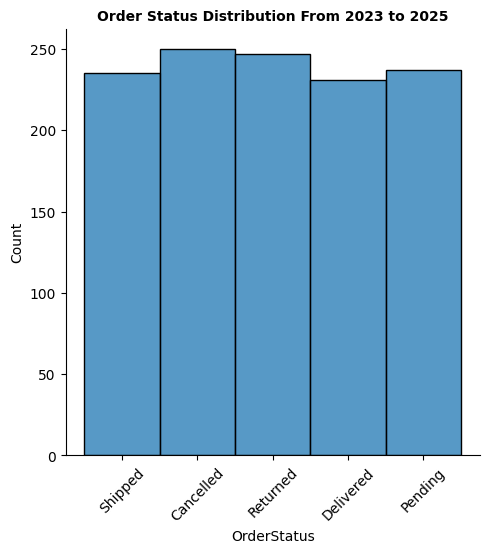

In [27]:

sns.displot(Store['OrderStatus'])
plt.title("Order Status Distribution From 2023 to 2025", fontsize = '10', fontweight ='bold', loc ='Center')
plt.xticks(rotation = 45)
plt.show()